# Looking at genre popularity

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [111]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

### Joining imdb_title_basics_df and imdb_ratings_df

The goal here is to see which movie genres performed well based on their average rating.

In [112]:
imdb_basics_rating_df = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

In [113]:
imdb_basics_rating_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [114]:
imdb_basics_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


We can see that the runtime_minutes and genres column have missing values that need to be addressed. Lets start by looking into the runtime_minutes columns.

### Addressing runtime_minutes column

In [115]:
imdb_basics_rating_df['runtime_minutes'].value_counts()

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
         ... 
212.0       1
278.0       1
225.0       1
467.0       1
746.0       1
Name: runtime_minutes, Length: 289, dtype: int64

In [116]:
imdb_basics_rating_df['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

runtime_minutes has a max of 51420 minutes which is very long for a movie. There are also other values for runtime which are too high. The best course of action would be to replace those unusually high runtime_minutes value and the missing values with the mean or median of the column. We will limit runtime_minutes to not exceed 150.

In [117]:
imdb_basics_rating_df_copy = imdb_basics_rating_df.copy()
minutes = imdb_basics_rating_df_copy['runtime_minutes']
minutes[minutes>150] = minutes.mean()

<ipython-input-117-65ce976b6901>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes[minutes>150] = minutes.mean()


Replacing runtime_minutes greater than 150 with the mean.

In [118]:
imdb_basics_rating_df_copy.loc[minutes>150,'runtime_minutes'] = minutes.mean() 

Replacing runtime_minutes that have missing values with the mean.

In [119]:
imdb_basics_rating_df_copy.loc[minutes.isna()==True,'runtime_minutes'] = minutes.mean()

Check

In [120]:
minutes.describe()

count    73856.000000
mean        91.969363
std         18.825770
min          3.000000
25%         83.000000
50%         91.969363
75%        100.000000
max        150.000000
Name: runtime_minutes, dtype: float64

In [121]:
imdb_basics_rating_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


runtime_minutes column now has no missing values

### Addressing ratings column

In [122]:
imdb_basics_rating_df_copy['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [123]:
imdb_basics_rating_df_copy['averagerating'].count()
#no missing data

73856

The ratings columns looks good.

### Looking for more missing data

In [124]:
imdb_basics_rating_df_copy['genres'].isna().sum()

804

The genres column has 804 missing columns. Since we are unable to replace the missing value with the most common movie genre since we may be inputting the wrong data by doing so, we will drop those rows. This should be fine since we don't lose a signifficant amount of rows.

In [125]:
imdb_basics_rating_df_copy = imdb_basics_rating_df_copy[imdb_basics_rating_df_copy['genres'].isna() != True] 

In [126]:
imdb_basics_rating_df_copy.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Our joint dataframe of interest has no more missing data.

### Checking for duplicates

In [127]:
imdb_basics_rating_df_copy.duplicated().sum()

0

Fortunately we do not have duplicates.

In [128]:
imdb_basics_rating_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


### Genres column

In [129]:
imdb_basics_rating_df_copy['genres'] = imdb_basics_rating_df_copy['genres'].str.replace(',','/')

In [130]:
imdb_basics_rating_df_copy.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,94.654040,Action/Crime/Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,Biography/Drama,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.969363,Comedy/Drama,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,Comedy/Drama/Fantasy,6.5,119


### Looking for the 10 most common movie genres that are rated above an 8 from IMDB 
We want to start by getting the movies that were rated at least an 8.

In [131]:
ratings_over_8 = imdb_basics_rating_df_copy[imdb_basics_rating_df_copy['averagerating'] >= 8]

Since each movie sometimes falls into multiple movie genres, we will create a genre dictionary that will keep track of each individual genre's occurence. This will give us a sense of the general movie genres that are were rated above an 8.

In [132]:
genres = ratings_over_8['genres']

In [133]:
genres = list(genres.unique())

In [134]:
x = []

for genre in genres:
    x.append(genre.split('/'))
    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [135]:
popular_genres = pd.Series(genres_freq)

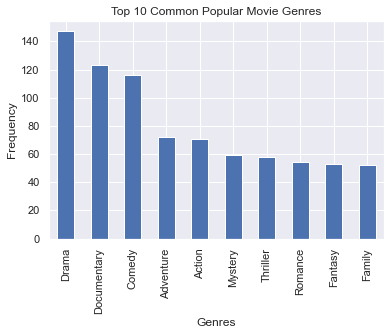

In [136]:
popular_genres.sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 Common Popular Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show();

## Ignore below, still figuring it out

### Looking at the gross

In [137]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [138]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [139]:
movie_gross_df_copy = movie_gross_df.copy()
movie_gross_df_copy.rename(columns={'title': 'primary_title'}, inplace=True)
movie_gross_df_copy

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [140]:
imdb_basics_rating_df_copy.loc[imdb_basics_rating_df_copy['primary_title'] == 'Toy Story 3']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
91,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Adventure/Animation/Comedy,8.3,682218


In [141]:
imdb_basics_rating_gross = pd.merge(left=imdb_basics_rating_df,right=movie_gross_df_copy,
                               on='primary_title',how='inner')

In [142]:
imdb_basics_rating_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [143]:
imdb_basics_rating_gross.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [144]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


Foreign_gross is of the string data type. We will need to convert this column to float data type.

In [145]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].str.replace(',','')

In [146]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].astype(float)

In [147]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


In [148]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['domestic_gross'].isna() != True]

In [149]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3005 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3005 non-null   object 
 1   primary_title    3005 non-null   object 
 2   original_title   3005 non-null   object 
 3   start_year       3005 non-null   int64  
 4   runtime_minutes  2958 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    3005 non-null   float64
 7   numvotes         3005 non-null   int64  
 8   studio           3004 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1810 non-null   float64
 11  year             3005 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 305.2+ KB


In [150]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['genres'].isna() != True]

In [151]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2998 non-null   object 
 1   primary_title    2998 non-null   object 
 2   original_title   2998 non-null   object 
 3   start_year       2998 non-null   int64  
 4   runtime_minutes  2953 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    2998 non-null   float64
 7   numvotes         2998 non-null   int64  
 8   studio           2997 non-null   object 
 9   domestic_gross   2998 non-null   float64
 10  foreign_gross    1803 non-null   float64
 11  year             2998 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 304.5+ KB


In [153]:
genres = list(imdb_basics_rating_gross['genres'].unique())
x = []

for genre in genres:
    x.append(str(genre).split(','))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [154]:
sorted_genres_frequency = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1],reverse=True)}

In [155]:
sorted_genres_frequency

{'Drama': 128,
 'Comedy': 86,
 'Action': 77,
 'Adventure': 55,
 'Thriller': 49,
 'Crime': 44,
 'Romance': 40,
 'Documentary': 40,
 'Fantasy': 39,
 'Mystery': 38,
 'Horror': 38,
 'Biography': 36,
 'Sci-Fi': 28,
 'Family': 27,
 'Animation': 26,
 'History': 26,
 'Sport': 19,
 'Music': 17,
 'War': 13,
 'Western': 12,
 'Musical': 8,
 'News': 3}

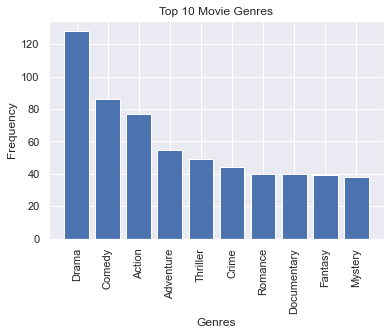

In [157]:
x = list(sorted_genres_frequency.keys())[:10]
y = list(sorted_genres_frequency.values())[:10]

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('Top 10 Movie Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Frequency')
plt.xticks(rotation =90);